**Linear Regression**

In [1]:
import torch 
import numpy as np

X = [ X_1, X_2, X_3] Y = [Y]

In [2]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')
targets = np.array([[56], 
                    [81], 
                    [119], 
                    [22], 
                    [103],
                    [57], 
                    [80], 
                    [118], 
                    [21], 
                    [104], 
                    [57], 
                    [82], 
                    [118], 
                    [20], 
                    [102]], 
                   dtype='float32')

In [3]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [4]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

In [5]:
w = torch.randn(1,3,requires_grad = True)
b = torch.randn(1, requires_grad = True)

In [7]:
print(w)
print(b)

tensor([[-0.8455,  0.3477, -0.8324]], requires_grad=True)
tensor([0.7380], requires_grad=True)


Linear Regression Model

In [6]:
def linear_reg_model(X):
  return X @ w.t() + b

In [8]:
preds = linear_reg_model(inputs)
print("The predicted output: ", preds)
print("The actual output: ",targets)

The predicted output:  tensor([[ -73.4817],
        [ -98.8794],
        [ -74.5067],
        [-101.3540],
        [ -82.4898],
        [ -74.6750],
        [-100.0596],
        [ -76.1847],
        [-100.1607],
        [ -82.4767],
        [ -74.6618],
        [-100.0727],
        [ -73.3266],
        [-101.3671],
        [ -81.2965]], grad_fn=<AddBackward0>)
The actual output:  tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.],
        [ 57.],
        [ 80.],
        [118.],
        [ 21.],
        [104.],
        [ 57.],
        [ 82.],
        [118.],
        [ 20.],
        [102.]])


In [9]:
def mse(prediction,target):
  m = len(inputs)
  error = target - prediction
  return torch.sum(error * error) / m

In [11]:
preds = linear_reg_model(inputs)
print("The predicted output: ", preds)
print("The actual output: ",targets)
print("Loss: ",mse(preds,targets))

The predicted output:  tensor([[ -73.4817],
        [ -98.8794],
        [ -74.5067],
        [-101.3540],
        [ -82.4898],
        [ -74.6750],
        [-100.0596],
        [ -76.1847],
        [-100.1607],
        [ -82.4767],
        [ -74.6618],
        [-100.0727],
        [ -73.3266],
        [-101.3671],
        [ -81.2965]], grad_fn=<AddBackward0>)
The actual output:  tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.],
        [ 57.],
        [ 80.],
        [118.],
        [ 21.],
        [104.],
        [ 57.],
        [ 82.],
        [118.],
        [ 20.],
        [102.]])
Loss:  tensor(27235.2871, grad_fn=<DivBackward0>)


Gradient Descent Algorithm 

In [12]:
epochs = 100000
lr = 1e-6
for i in range(epochs):
  preds = linear_reg_model(inputs)
  loss  = mse(preds,targets)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * lr
    b -= b.grad * lr
    w.grad.zero_()
    b.grad.zero_()
  print(f"Epochs {i} Loss {loss}")


Streaming output truncated to the last 5000 lines.
Epochs 95000 Loss 1.0402047634124756
Epochs 95001 Loss 1.0402047634124756
Epochs 95002 Loss 1.0402047634124756
Epochs 95003 Loss 1.0402047634124756
Epochs 95004 Loss 1.0402047634124756
Epochs 95005 Loss 1.0402047634124756
Epochs 95006 Loss 1.0402047634124756
Epochs 95007 Loss 1.0402047634124756
Epochs 95008 Loss 1.0402047634124756
Epochs 95009 Loss 1.0402047634124756
Epochs 95010 Loss 1.0402047634124756
Epochs 95011 Loss 1.0402047634124756
Epochs 95012 Loss 1.0402047634124756
Epochs 95013 Loss 1.0402047634124756
Epochs 95014 Loss 1.0402047634124756
Epochs 95015 Loss 1.0402047634124756
Epochs 95016 Loss 1.0402047634124756
Epochs 95017 Loss 1.0402047634124756
Epochs 95018 Loss 1.0402047634124756
Epochs 95019 Loss 1.0402047634124756
Epochs 95020 Loss 1.0402047634124756
Epochs 95021 Loss 1.0402047634124756
Epochs 95022 Loss 1.0402047634124756
Epochs 95023 Loss 1.0402047634124756
Epochs 95024 Loss 1.0402047634124756
Epochs 95025 Loss 1.0402

In [13]:
preds = linear_reg_model(inputs)
print("The predicted output: ", preds)
print("The actual output: ",targets)

The predicted output:  tensor([[ 57.0777],
        [ 81.9584],
        [118.1677],
        [ 20.8026],
        [101.8885],
        [ 55.8254],
        [ 81.8108],
        [118.4519],
        [ 22.0549],
        [102.9932],
        [ 56.9301],
        [ 80.7061],
        [118.3153],
        [ 19.6978],
        [103.1409]], grad_fn=<AddBackward0>)
The actual output:  tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.],
        [ 57.],
        [ 80.],
        [118.],
        [ 21.],
        [104.],
        [ 57.],
        [ 82.],
        [118.],
        [ 20.],
        [102.]])


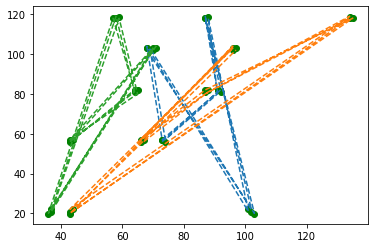

In [18]:
import matplotlib.pyplot as plt
predict = preds.detach().numpy()
actual = targets.detach().numpy()
plt.plot(inputs,predict, 'go', label = 'predicted')
plt.plot(inputs,actual, '--', label = 'actual data')
plt.show()